#### Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Understanding the data

In [43]:
strategy1 = pd.read_csv('strategy1.csv')
strategy2 = pd.read_csv('strategy2.csv')

In [44]:
forecast = pd.read_excel('Book1.xlsx')

In [45]:
strategy1.shape

(25344, 15)

In [46]:
strategy1.head()

interval_begin               interval_end      Date  Month  \
0  2021-05-05 00:00:00+10:00  2021-05-05 00:05:00+10:00  5/5/2021      5   
1  2021-05-05 00:05:00+10:00  2021-05-05 00:10:00+10:00  5/5/2021      5   
2  2021-05-05 00:10:00+10:00  2021-05-05 00:15:00+10:00  5/5/2021      5   
3  2021-05-05 00:15:00+10:00  2021-05-05 00:20:00+10:00  5/5/2021      5   
4  2021-05-05 00:20:00+10:00  2021-05-05 00:25:00+10:00  5/5/2021      5   

   Hour Ending  charging_mwh  discharging_mwh  state_of_charge_mwh  \
0            1           1.3             0.00                59.66   
1            1           1.3             0.00                60.96   
2            1           0.0             0.38                60.58   
3            1           0.0             0.38                60.20   
4            1           1.3             0.00                61.50   

   cleared_mw_gen_energy  cleared_mw_load_energy  cleared_mw_raise_reg  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                    80   
3                      0                       0                    80   
4                      0                       0                     0   

   cleared_mw_lower_reg  price_energy  price_lower_reg  price_raise_reg  
0                    80         36.11             5.50             5.98  
1                    80         36.35             5.50             7.99  
2                    80         36.98             7.73            11.09  
3                    80         36.79             9.98             8.20  
4                    80         36.79            10.70             7.99

In [47]:
strategy1.dtypes

interval_begin             object
interval_end               object
Date                       object
Month                       int64
Hour Ending                 int64
charging_mwh              float64
discharging_mwh           float64
state_of_charge_mwh       float64
cleared_mw_gen_energy       int64
cleared_mw_load_energy      int64
cleared_mw_raise_reg        int64
cleared_mw_lower_reg        int64
price_energy              float64
price_lower_reg           float64
price_raise_reg           float64
dtype: object

In [48]:
strategy1.describe()

Month   Hour Ending  charging_mwh  discharging_mwh  \
count  25344.000000  25344.000000  25344.000000     25344.000000   
mean       6.045455     12.500000      0.784731         0.800479   
std        0.810587      6.922323      1.398210         1.447524   
min        5.000000      1.000000      0.000000         0.000000   
25%        5.000000      6.750000      0.000000         0.000000   
50%        6.000000     12.500000      0.000000         0.380000   
75%        7.000000     18.250000      1.300000         0.880000   
max        7.000000     24.000000      6.130000         7.250000   

       state_of_charge_mwh  cleared_mw_gen_energy  cleared_mw_load_energy  \
count         25344.000000           25344.000000            25344.000000   
mean             93.032369               4.530816                8.485164   
std              40.642083              18.108319               24.152412   
min              21.240000               0.000000                0.000000   
25%              55.867500               0.000000                0.000000   
50%              91.905000               0.000000                0.000000   
75%             130.302500               0.000000                0.000000   
max             166.540000              80.000000               80.000000   

       cleared_mw_raise_reg  cleared_mw_lower_reg  price_energy  \
count          25344.000000          25344.000000  25344.000000   
mean              44.291233             44.921796     98.680689   
std               39.323551             39.072453    532.222700   
min                0.000000              0.000000  -1000.000000   
25%                0.000000              0.000000     34.047500   
50%               80.000000             80.000000     62.000000   
75%               80.000000             80.000000    100.905000   
max               80.000000             80.000000  15000.000000   

       price_lower_reg  price_raise_reg  
count     25344.000000     25344.000000  
mean         11.943976        27.482937  
std           5.310505       174.917165  
min           0.080000         0.810000  
25%           8.300000         8.000000  
50%          10.700000        13.275000  
75%          14.000000        24.900000  
max         101.070000     13464.700000

In [49]:
strategy2.describe()

Month   Hour Ending  charging_mwh  discharging_mwh  \
count  25344.000000  25344.000000  25344.000000     25344.000000   
mean       6.045455     12.500000      0.535607         0.637266   
std        0.810587      6.922323      0.916674         1.273456   
min        5.000000      1.000000      0.000000         0.000000   
25%        5.000000      6.750000      0.000000         0.000000   
50%        6.000000     12.500000      0.000000         0.000000   
75%        7.000000     18.250000      1.300000         0.380000   
max        7.000000     24.000000      6.130000         7.250000   

       state_of_charge_mwh  cleared_mw_gen_energy  cleared_mw_load_energy  \
count         25344.000000           25344.000000            25344.000000   
mean             47.777159               4.217961                2.230193   
std              30.483124              16.198581               12.972271   
min               0.450000               0.000000                0.000000   
25%              33.220000               0.000000                0.000000   
50%              35.420000               0.000000                0.000000   
75%              43.180000               0.000000                0.000000   
max             166.150000              80.000000               80.000000   

       cleared_mw_raise_reg  cleared_mw_lower_reg  price_energy  \
count          25344.000000          25344.000000  25344.000000   
mean              34.620502             50.771267     98.680694   
std               36.964857             38.094641    532.222865   
min                0.000000              0.000000  -1000.000000   
25%                0.000000              0.000000     34.047500   
50%               12.000000             80.000000     62.000000   
75%               80.000000             80.000000    100.905000   
max               80.000000             80.000000  15000.000000   

       price_lower_reg  price_raise_reg  
count     25344.000000     25344.000000  
mean         11.943976        27.482937  
std           5.310505       174.917165  
min           0.080000         0.810000  
25%           8.300000         8.000000  
50%          10.700000        13.275000  
75%          14.000000        24.900000  
max         101.070000     13464.700000

#### Plotting variables - hidden

In [50]:
## Plot charging_mwh (energy & regulation) over time for strategy 1
##plt.figure(figsize=(30,20))
##strategy1.groupby('Date').charging_mwh.mean().plot()
##plt.title('Charging_mwh vs Time')
##plt.xticks(strategy1.groupby('Date').charging_mwh.mean().reset_index().index,
           #labels = strategy1.groupby('Date').charging_mwh.mean().reset_index()['Date'],
           #rotation = 45)
##plt.tight_layout()

In [51]:
## Plot charging_mwh (energy & regulation) over time for strategy 2
##plt.figure(figsize=(30,20))
##strategy2.groupby('Date').charging_mwh.mean().plot(color='red')
##plt.title('Charging_mwh vs Time')
##plt.xticks(strategy2.groupby('Date').charging_mwh.mean().reset_index().index,
          ## labels = strategy2.groupby('Date').charging_mwh.mean().reset_index()['Date'],
          ## rotation = 45)
##plt.tight_layout()

In [52]:
#discharging_mwh(energy & regulation) over time for strategy 1

##plt.figure(figsize=(30,20))
##strategy1.groupby('Date').discharging_mwh.mean().plot()
##plt.title('Discharging_mwh vs Time')
##plt.xticks(strategy1.groupby('Date').discharging_mwh.mean().reset_index().index,
           ##labels = strategy1.groupby('Date').discharging_mwh.mean().reset_index()['Date'],
          ## rotation = 45)
##plt.tight_layout()

In [53]:
#discharging_mwh(energy & regulation) over time for strategy 2

##plt.figure(figsize=(30,20))
##strategy2.groupby('Date').discharging_mwh.mean().plot(color='red')
##plt.title('Discharging_mwh vs Time')
#plt.xticks(strategy2.groupby('Date').discharging_mwh.mean().reset_index().index,
           #labels = strategy2.groupby('Date').discharging_mwh.mean().reset_index()['Date'],
           #rotation = 45)
#plt.tight_layout()

In [54]:
# state_of_charge_mwh over time for strategy 1

#plt.figure(figsize=(30,20))
#strategy1.groupby('Date').state_of_charge_mwh.mean().plot()
#plt.title('State_of_charge_mwh vs Time')
#plt.xticks(strategy1.groupby('Date').state_of_charge_mwh.mean().reset_index().index,
           #labels = strategy1.groupby('Date').state_of_charge_mwh.mean().reset_index()['Date'],
           #rotation = 45)
#plt.tight_layout()

In [55]:
# state_of_charge_mwh over time for strategy 2

#plt.figure(figsize=(30,20))
#strategy2.groupby('Date').state_of_charge_mwh.mean().plot(color='red')
#plt.title('State_of_charge_mwh vs Time')
#plt.xticks(strategy2.groupby('Date').state_of_charge_mwh.mean().reset_index().index,
         #  labels = strategy2.groupby('Date').state_of_charge_mwh.mean().reset_index()['Date'],
          # rotation = 45)
#plt.tight_layout()

In [56]:
# cleared_mw_gen_energy for strategy 1

#plt.figure(figsize=(30,20))
#strategy1.groupby('Date').cleared_mw_gen_energy.mean().plot()
#plt.title('Cleared_mw_gen_energy vs Time')
#plt.xticks(strategy1.groupby('Date').cleared_mw_gen_energy.mean().reset_index().index,
 #          labels = strategy1.groupby('Date').cleared_mw_gen_energy.mean().reset_index()['Date'],
  #         rotation = 45)
#plt.tight_layout()

In [57]:

# cleared_mw_gen_energy for strategy 2

#plt.figure(figsize=(30,20))
#strategy2.groupby('Date').cleared_mw_gen_energy.mean().plot(color='red')
#plt.title('Cleared_mw_gen_energy vs Time')
#plt.xticks(strategy2.groupby('Date').cleared_mw_gen_energy.mean().reset_index().index,
 #          labels = strategy2.groupby('Date').cleared_mw_gen_energy.mean().reset_index()['Date'],
  #         rotation = 45)
#plt.tight_layout()

In [58]:
# Cleared_mw_load_energy for strategy 1

#plt.figure(figsize=(30,20))
#strategy1.groupby('Date').cleared_mw_load_energy.mean().plot()
#plt.title('Cleared_mw_load_energy vs Time')
#plt.xticks(strategy1.groupby('Date').cleared_mw_load_energy.mean().reset_index().index,
#           labels = strategy1.groupby('Date').cleared_mw_load_energy.mean().reset_index()['Date'],
#           rotation = 45)
#plt.tight_layout()

In [59]:
# Cleared_mw_load_energy for strategy 2

#plt.figure(figsize=(30,20))
#strategy2.groupby('Date').cleared_mw_load_energy.mean().plot(color='red')
#plt.title('Cleared_mw_load_energy vs Time')
#plt.xticks(strategy2.groupby('Date').cleared_mw_load_energy.mean().reset_index().index,
#           labels = strategy2.groupby('Date').cleared_mw_load_energy.mean().reset_index()['Date'],
#           rotation = 45)
#plt.tight_layout()

In [60]:
# cleared_mw_raise_reg for strategy 1

#plt.figure(figsize=(30,20))
#strategy1.groupby('Date').cleared_mw_raise_reg.mean().plot()
#plt.title('Cleared_mw_raise_reg vs Time')
#plt.xticks(strategy1.groupby('Date').cleared_mw_raise_reg.mean().reset_index().index,
#           labels = strategy1.groupby('Date').cleared_mw_raise_reg.mean().reset_index()['Date'],
#           rotation = 45)
#plt.tight_layout()

In [61]:
# cleared_mw_raise_reg for strategy 2

#plt.figure(figsize=(30,20))
#strategy2.groupby('Date').cleared_mw_raise_reg.mean().plot(color='red')
#plt.title('Cleared_mw_raise_reg vs Time')
#plt.xticks(strategy2.groupby('Date').cleared_mw_raise_reg.mean().reset_index().index,
#           labels = strategy2.groupby('Date').cleared_mw_raise_reg.mean().reset_index()['Date'],
#           rotation = 45)
#plt.tight_layout()

In [62]:
# cleared_mw_lower_reg for strategy 1

#plt.figure(figsize=(30,20))
#strategy1.groupby('Date').cleared_mw_lower_reg.mean().plot()
#plt.title('Cleared_mw_lower_reg vs Time')
#plt.xticks(strategy1.groupby('Date').cleared_mw_lower_reg.mean().reset_index().index,
 #          labels = strategy1.groupby('Date').cleared_mw_lower_reg.mean().reset_index()['Date'],
  #         rotation = 45)
#plt.tight_layout()

In [63]:
# cleared_mw_lower_reg for strategy 2

#plt.figure(figsize=(30,20))
#strategy2.groupby('Date').cleared_mw_lower_reg.mean().plot(color='red')
#plt.title('Cleared_mw_lower_reg vs Time')
#plt.xticks(strategy2.groupby('Date').cleared_mw_lower_reg.mean().reset_index().index,
#           labels = strategy2.groupby('Date').cleared_mw_lower_reg.mean().reset_index()['Date'],
#           rotation = 45)
#plt.tight_layout()

#### Plotting prices

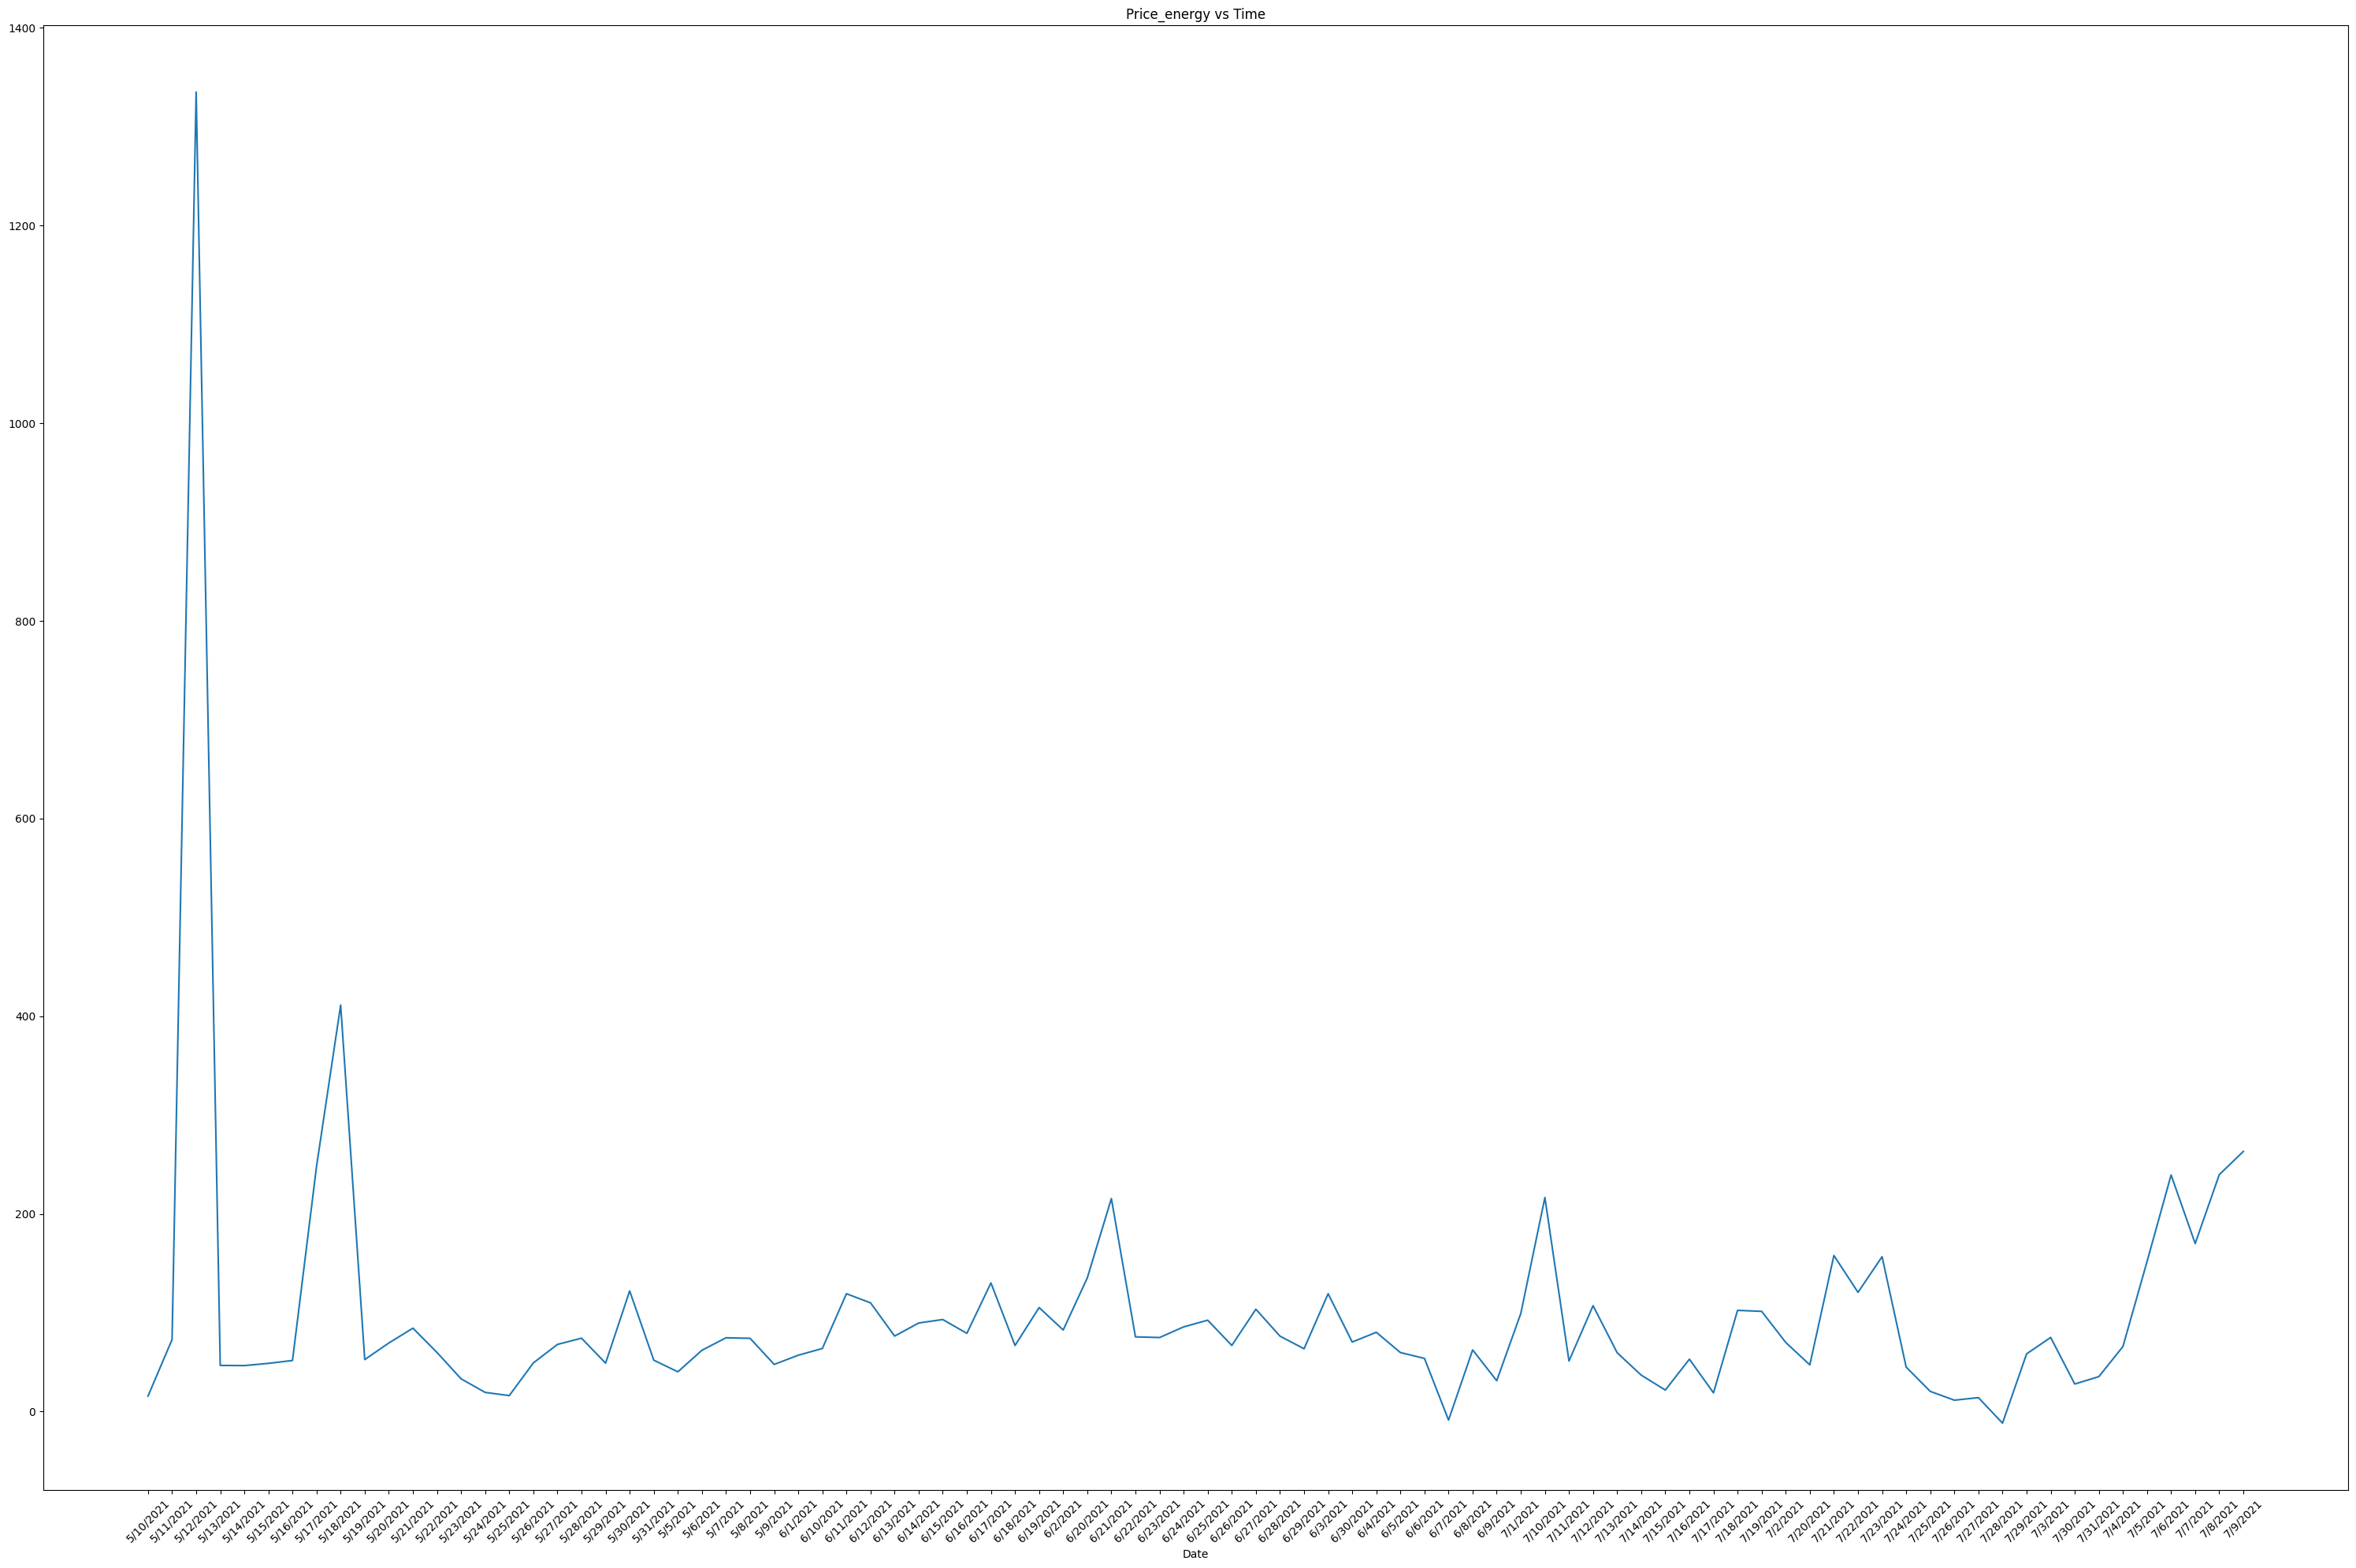

In [64]:
# price_energy
plt.figure(figsize=(30,20))
strategy1.groupby('Date').price_energy.mean().plot()
plt.title('Price_energy vs Time')
plt.xticks(strategy1.groupby('Date').price_energy.mean().reset_index().index,
           labels = strategy1.groupby('Date').price_energy.mean().reset_index()['Date'],
           rotation = 45)
plt.tight_layout()

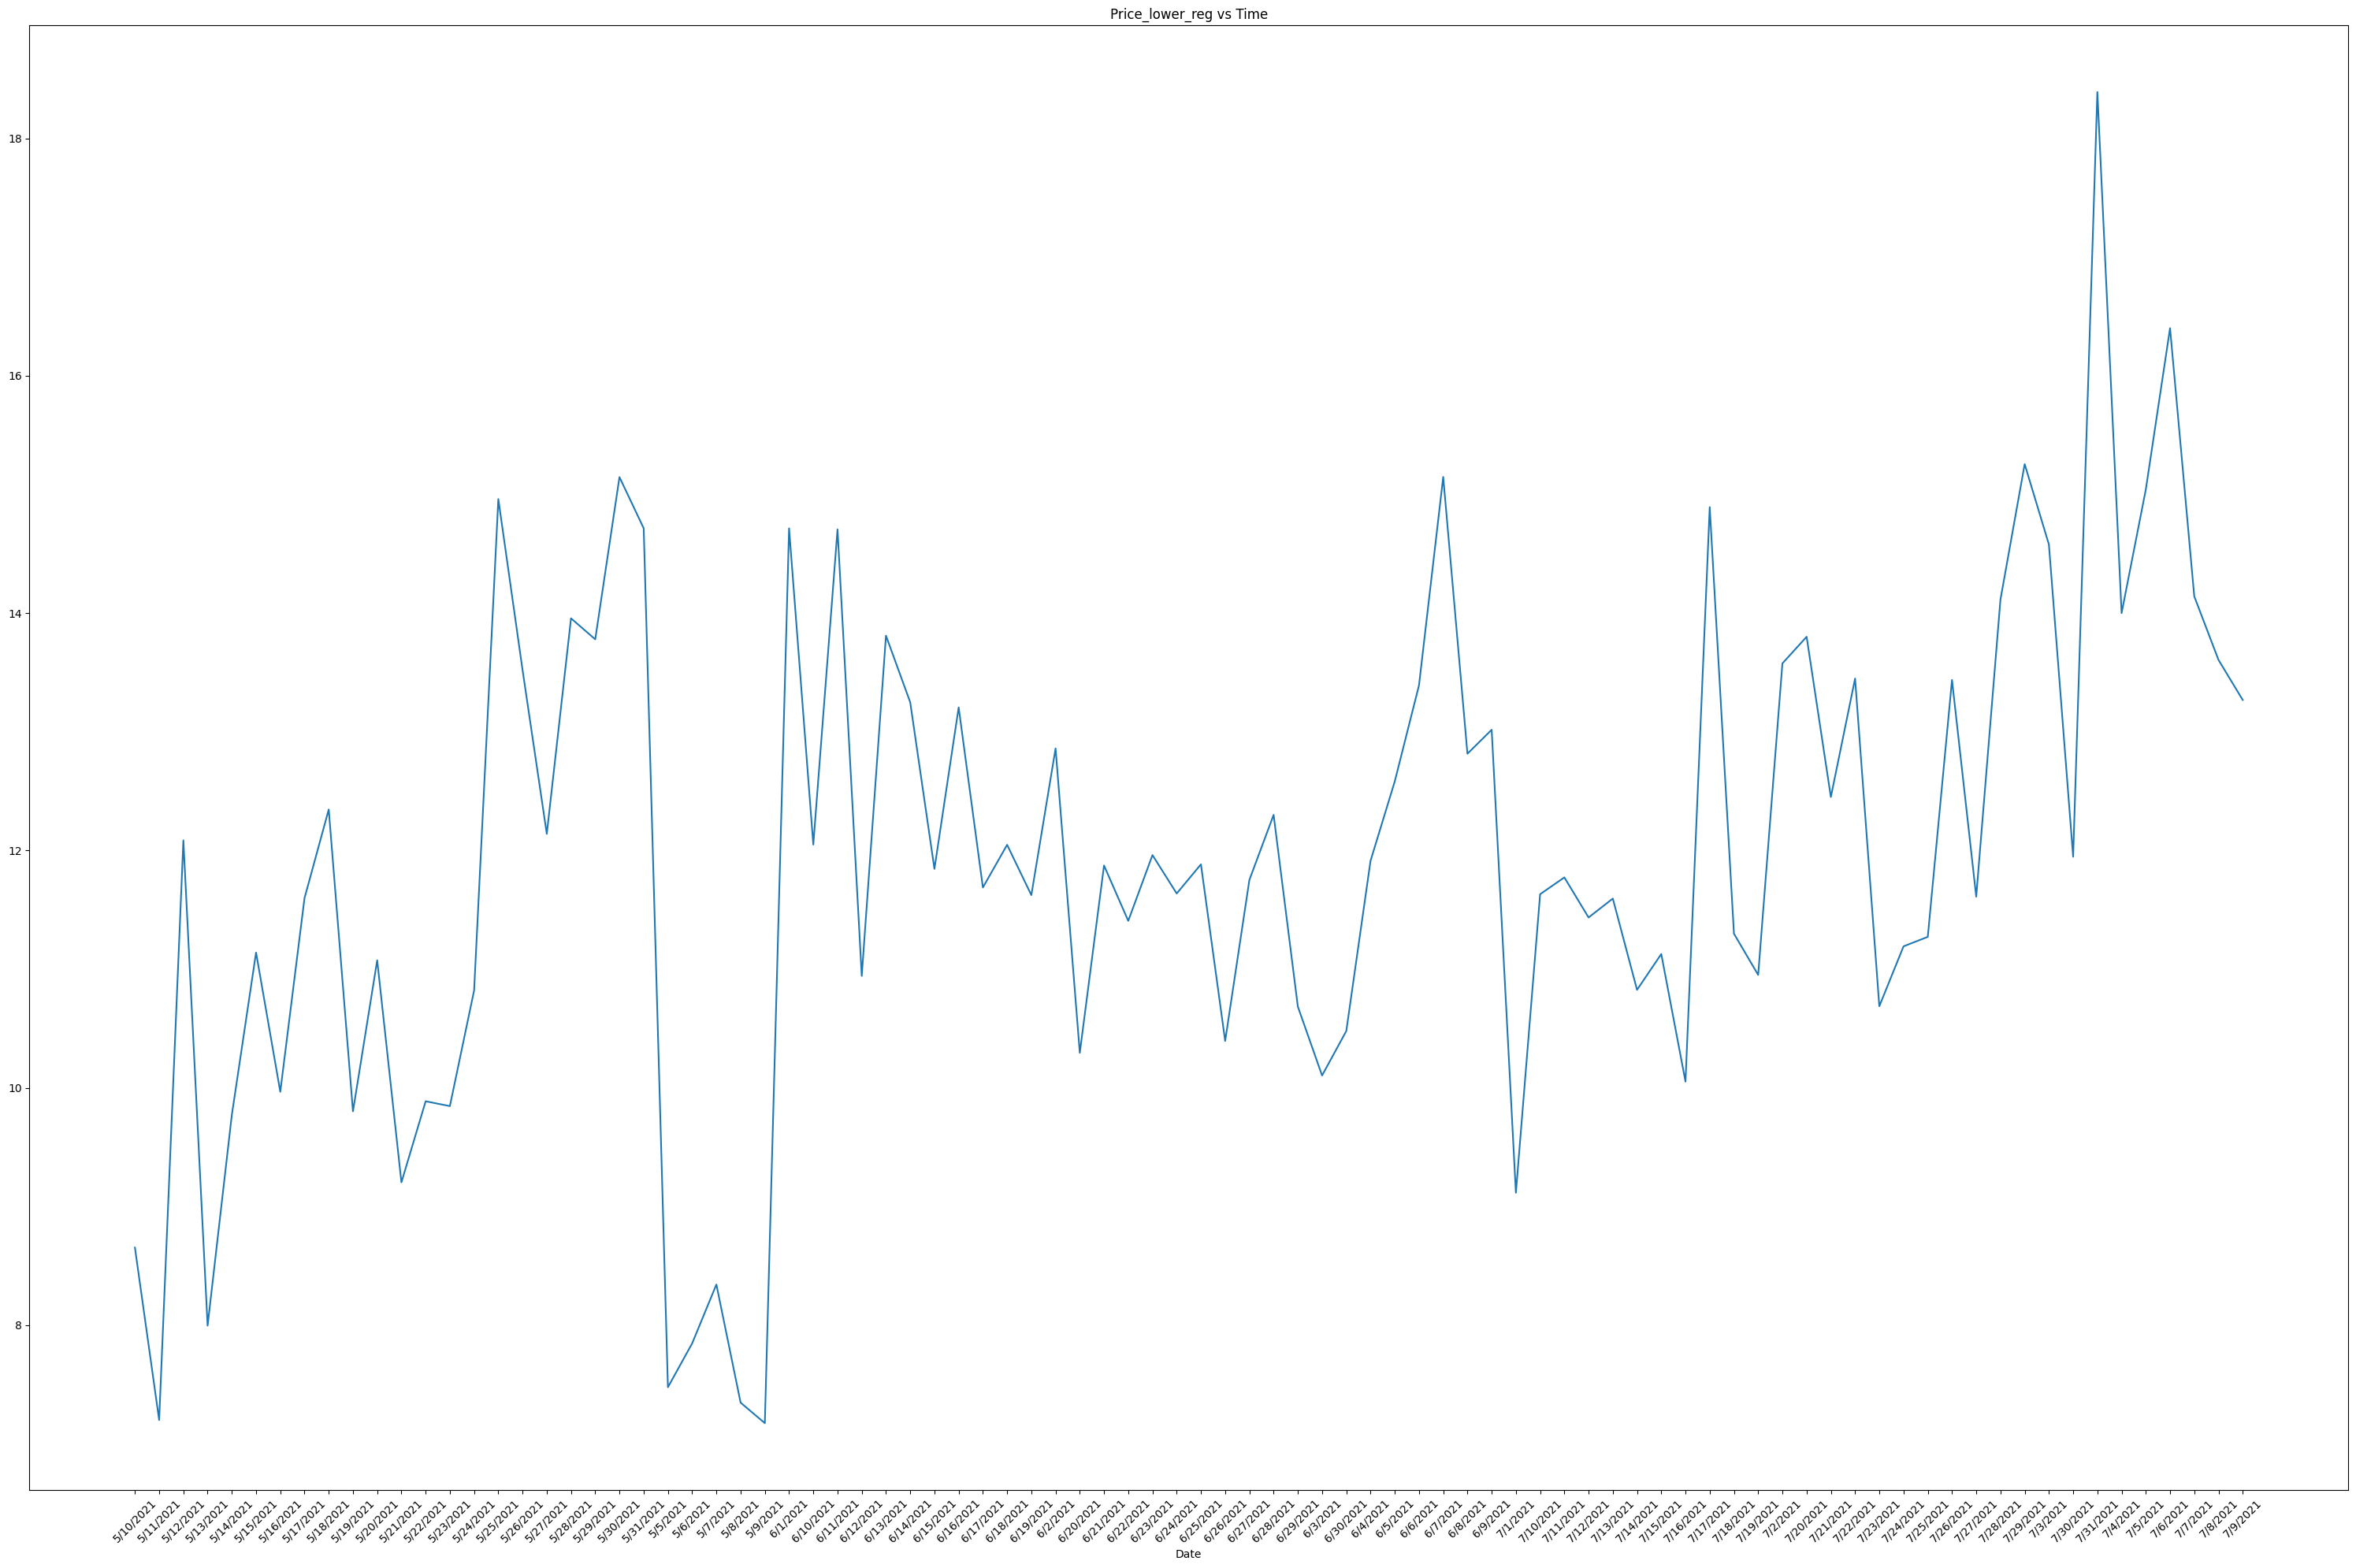

In [65]:
# price_lower_reg
plt.figure(figsize=(30,20))
strategy1.groupby('Date').price_lower_reg.mean().plot()
plt.title('Price_lower_reg vs Time')
plt.xticks(strategy1.groupby('Date').price_lower_reg.mean().reset_index().index,
           labels = strategy1.groupby('Date').price_lower_reg.mean().reset_index()['Date'],
           rotation = 45)
plt.tight_layout()

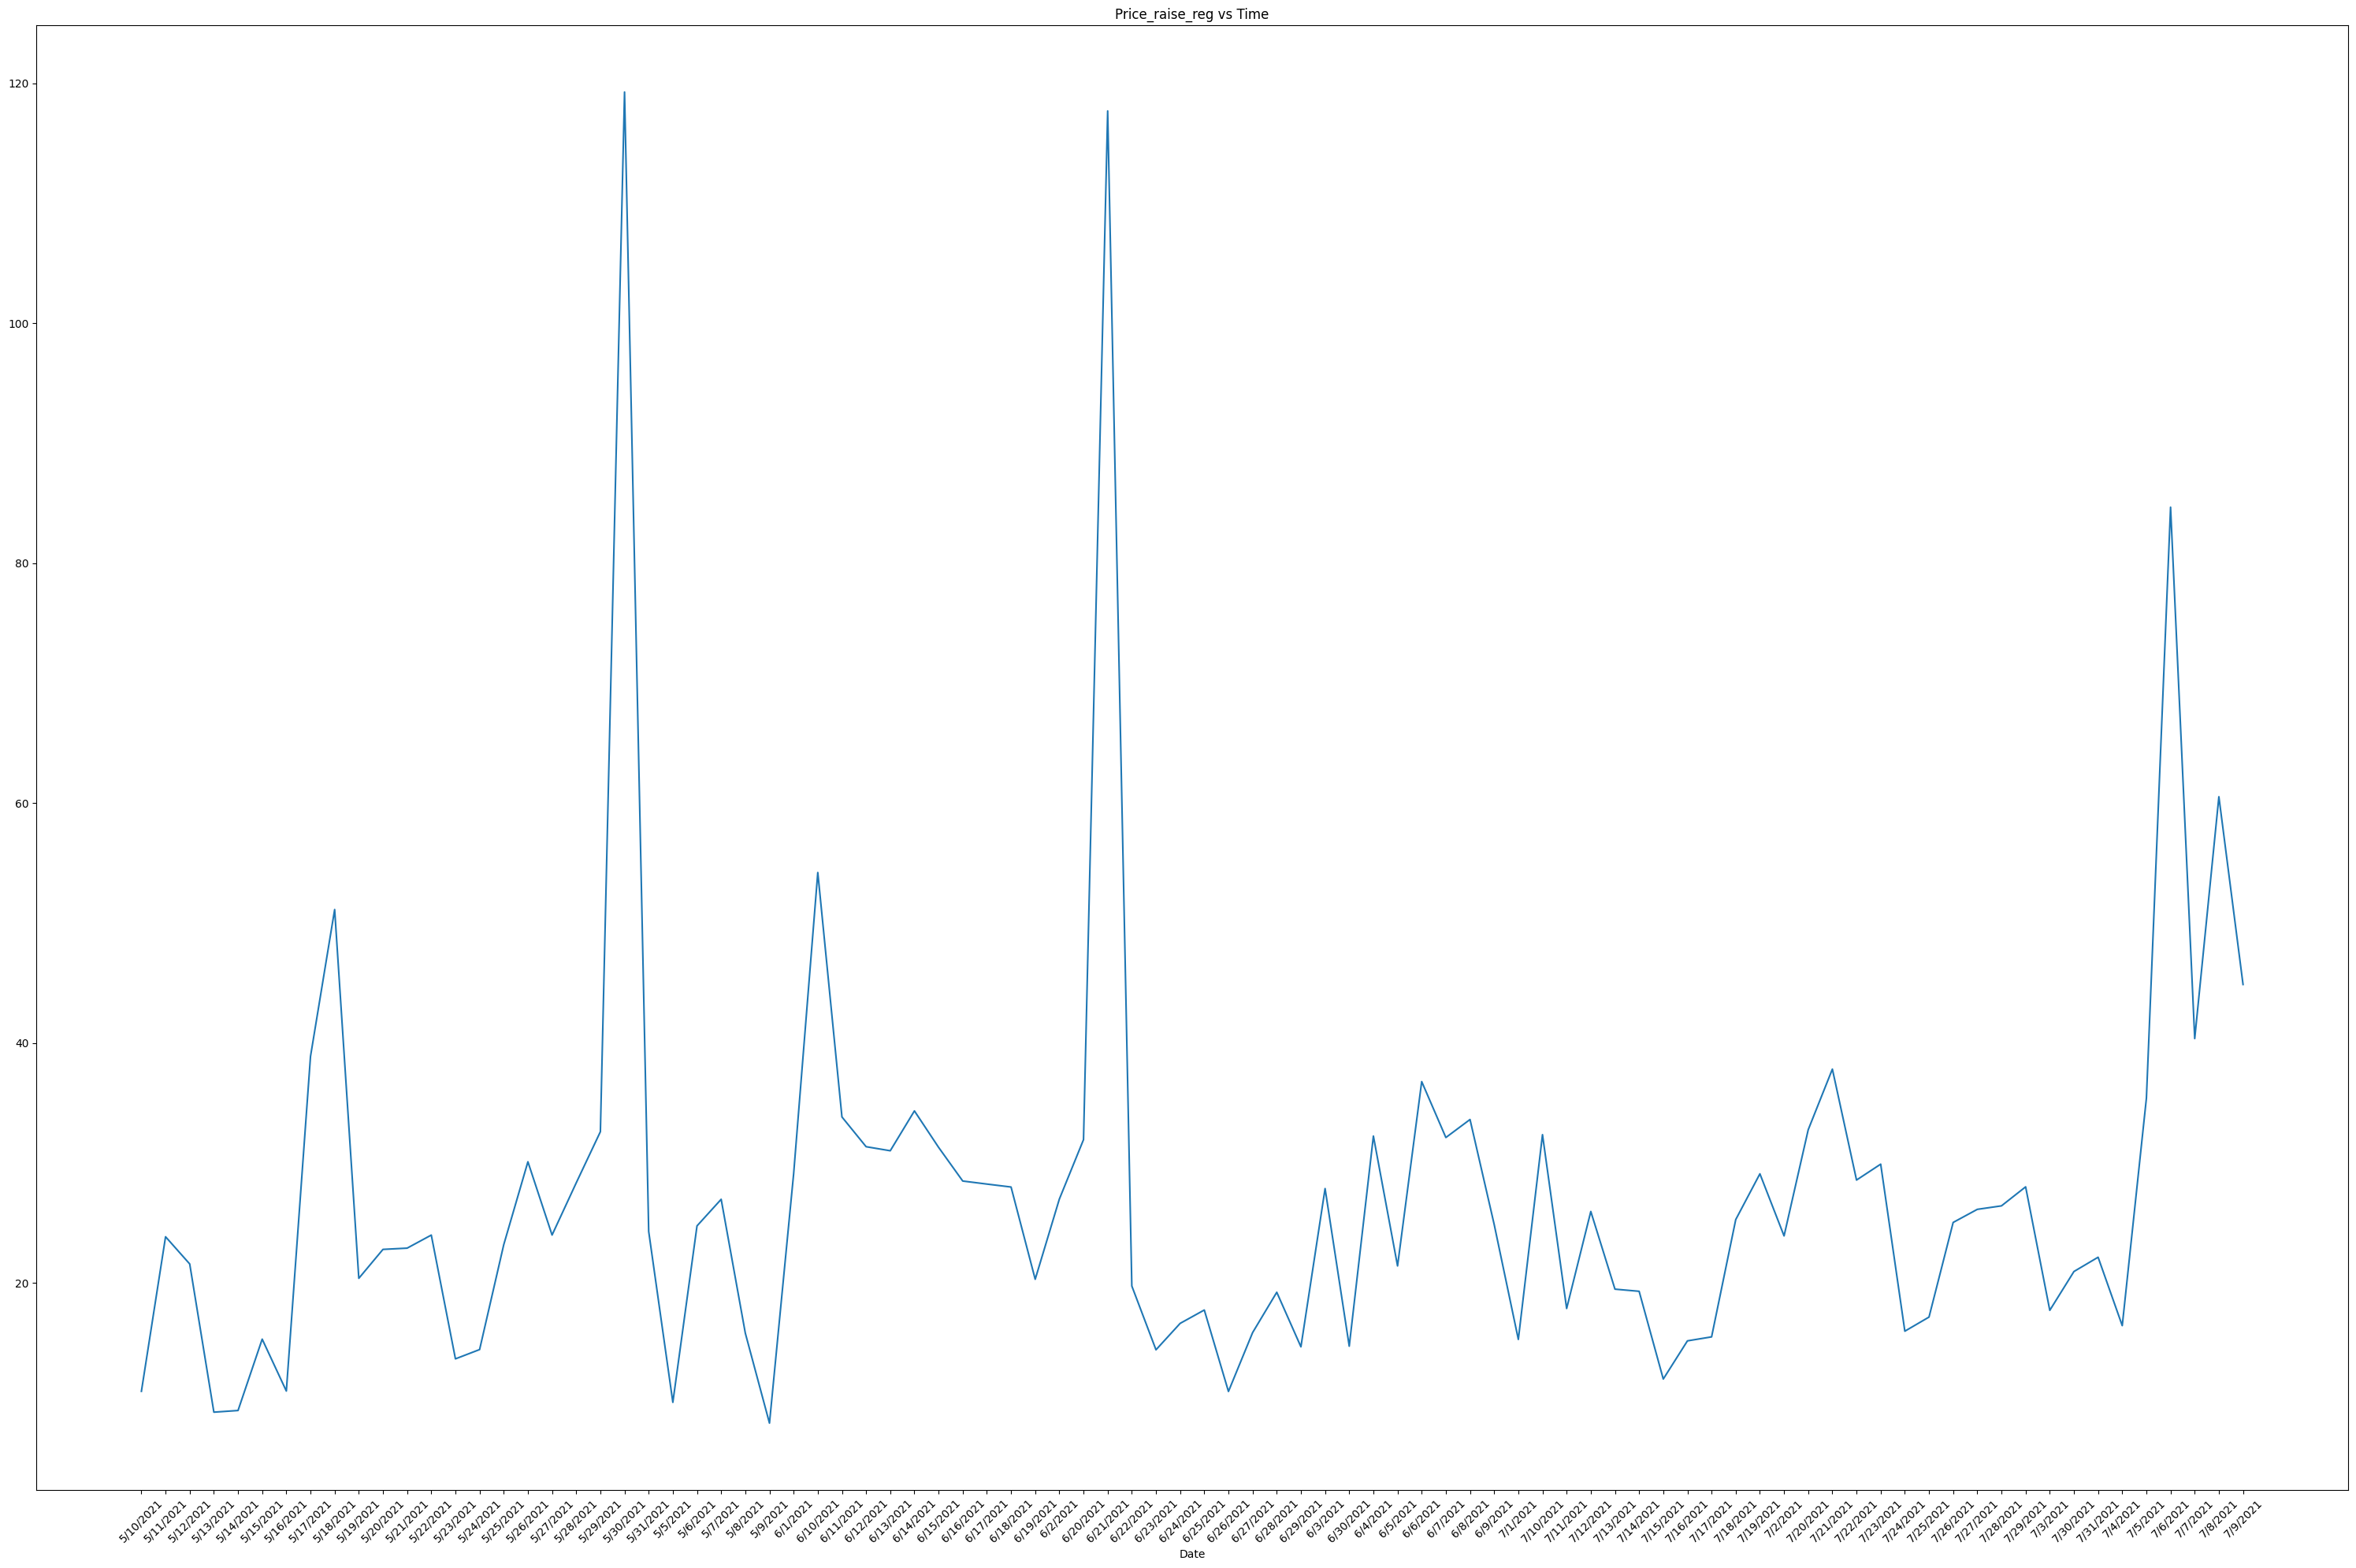

In [66]:
# price_raise_reg
plt.figure(figsize=(30,20))
strategy1.groupby('Date').price_raise_reg.mean().plot()
plt.title('Price_raise_reg vs Time')
plt.xticks(strategy1.groupby('Date').price_raise_reg.mean().reset_index().index,
           labels = strategy1.groupby('Date').price_raise_reg.mean().reset_index()['Date'],
           rotation = 45)
plt.tight_layout()

#### Strategy 1 Energy products: Capacity Payment for gen & load

In [67]:

strategy1['gen_energy'] = strategy1.cleared_mw_gen_energy*strategy1.price_energy*(5/60)
strategy1['load_energy'] = strategy1.cleared_mw_load_energy*strategy1.price_energy*(5/60)

#### Strategy 2 Energy products: Capacity Payment for gen & load

In [68]:

strategy2['gen_energy'] = strategy2.cleared_mw_gen_energy*strategy2.price_energy*(5/60)
strategy2['load_energy'] = strategy2.cleared_mw_load_energy*strategy2.price_energy*(5/60)

#### Strategy 1 Energy Products: Energy Settlement

In [69]:

strategy1['discharged_reg_raise'] = strategy1.discharging_mwh*strategy1.price_energy
strategy1['charged_reg_lower'] = strategy1.charging_mwh*strategy1.price_energy*(-1)

#### Strategy 2 Energy Products: Energy Settlement

In [70]:
###Energy Settlement
strategy2['discharged_reg_raise'] = strategy2.discharging_mwh*strategy2.price_energy
strategy2['charged_reg_lower'] = strategy2.charging_mwh*strategy2.price_energy*(-1)

#### Strategy 1 Capacity Payments for reg_riase and reg_lower at 5-minute interval

In [71]:
### Capacity Payment
strategy1['reg_raise'] = strategy1.cleared_mw_gen_energy*strategy1.price_raise_reg*(5/60)
strategy1['reg_lower'] = strategy1.cleared_mw_gen_energy*strategy1.price_lower_reg*(5/60)

#### Strategy 2 Capacity Payments for reg_riase and reg_lower at 5-minute interval

In [72]:
### Capacity Payment
strategy2['reg_raise'] = strategy2.cleared_mw_gen_energy*strategy2.price_raise_reg*(5/60)
strategy2['reg_lower'] = strategy2.cleared_mw_gen_energy*strategy2.price_lower_reg*(5/60)

#### Revenue for Strategy 1

In [73]:

strategy1['strategy1_revenue'] = strategy1.gen_energy + strategy1.load_energy + strategy1.discharged_reg_raise + strategy1.charged_reg_lower + strategy1.reg_raise + strategy1.reg_lower

#### Revenue for Strategy 2

In [74]:

strategy2['strategy2_revenue'] = strategy2.gen_energy + strategy2.load_energy + strategy2.discharged_reg_raise + strategy2.charged_reg_lower + strategy2.reg_raise + strategy2.reg_lower

#### Revenue for strategy1 in a daily and monthly basis

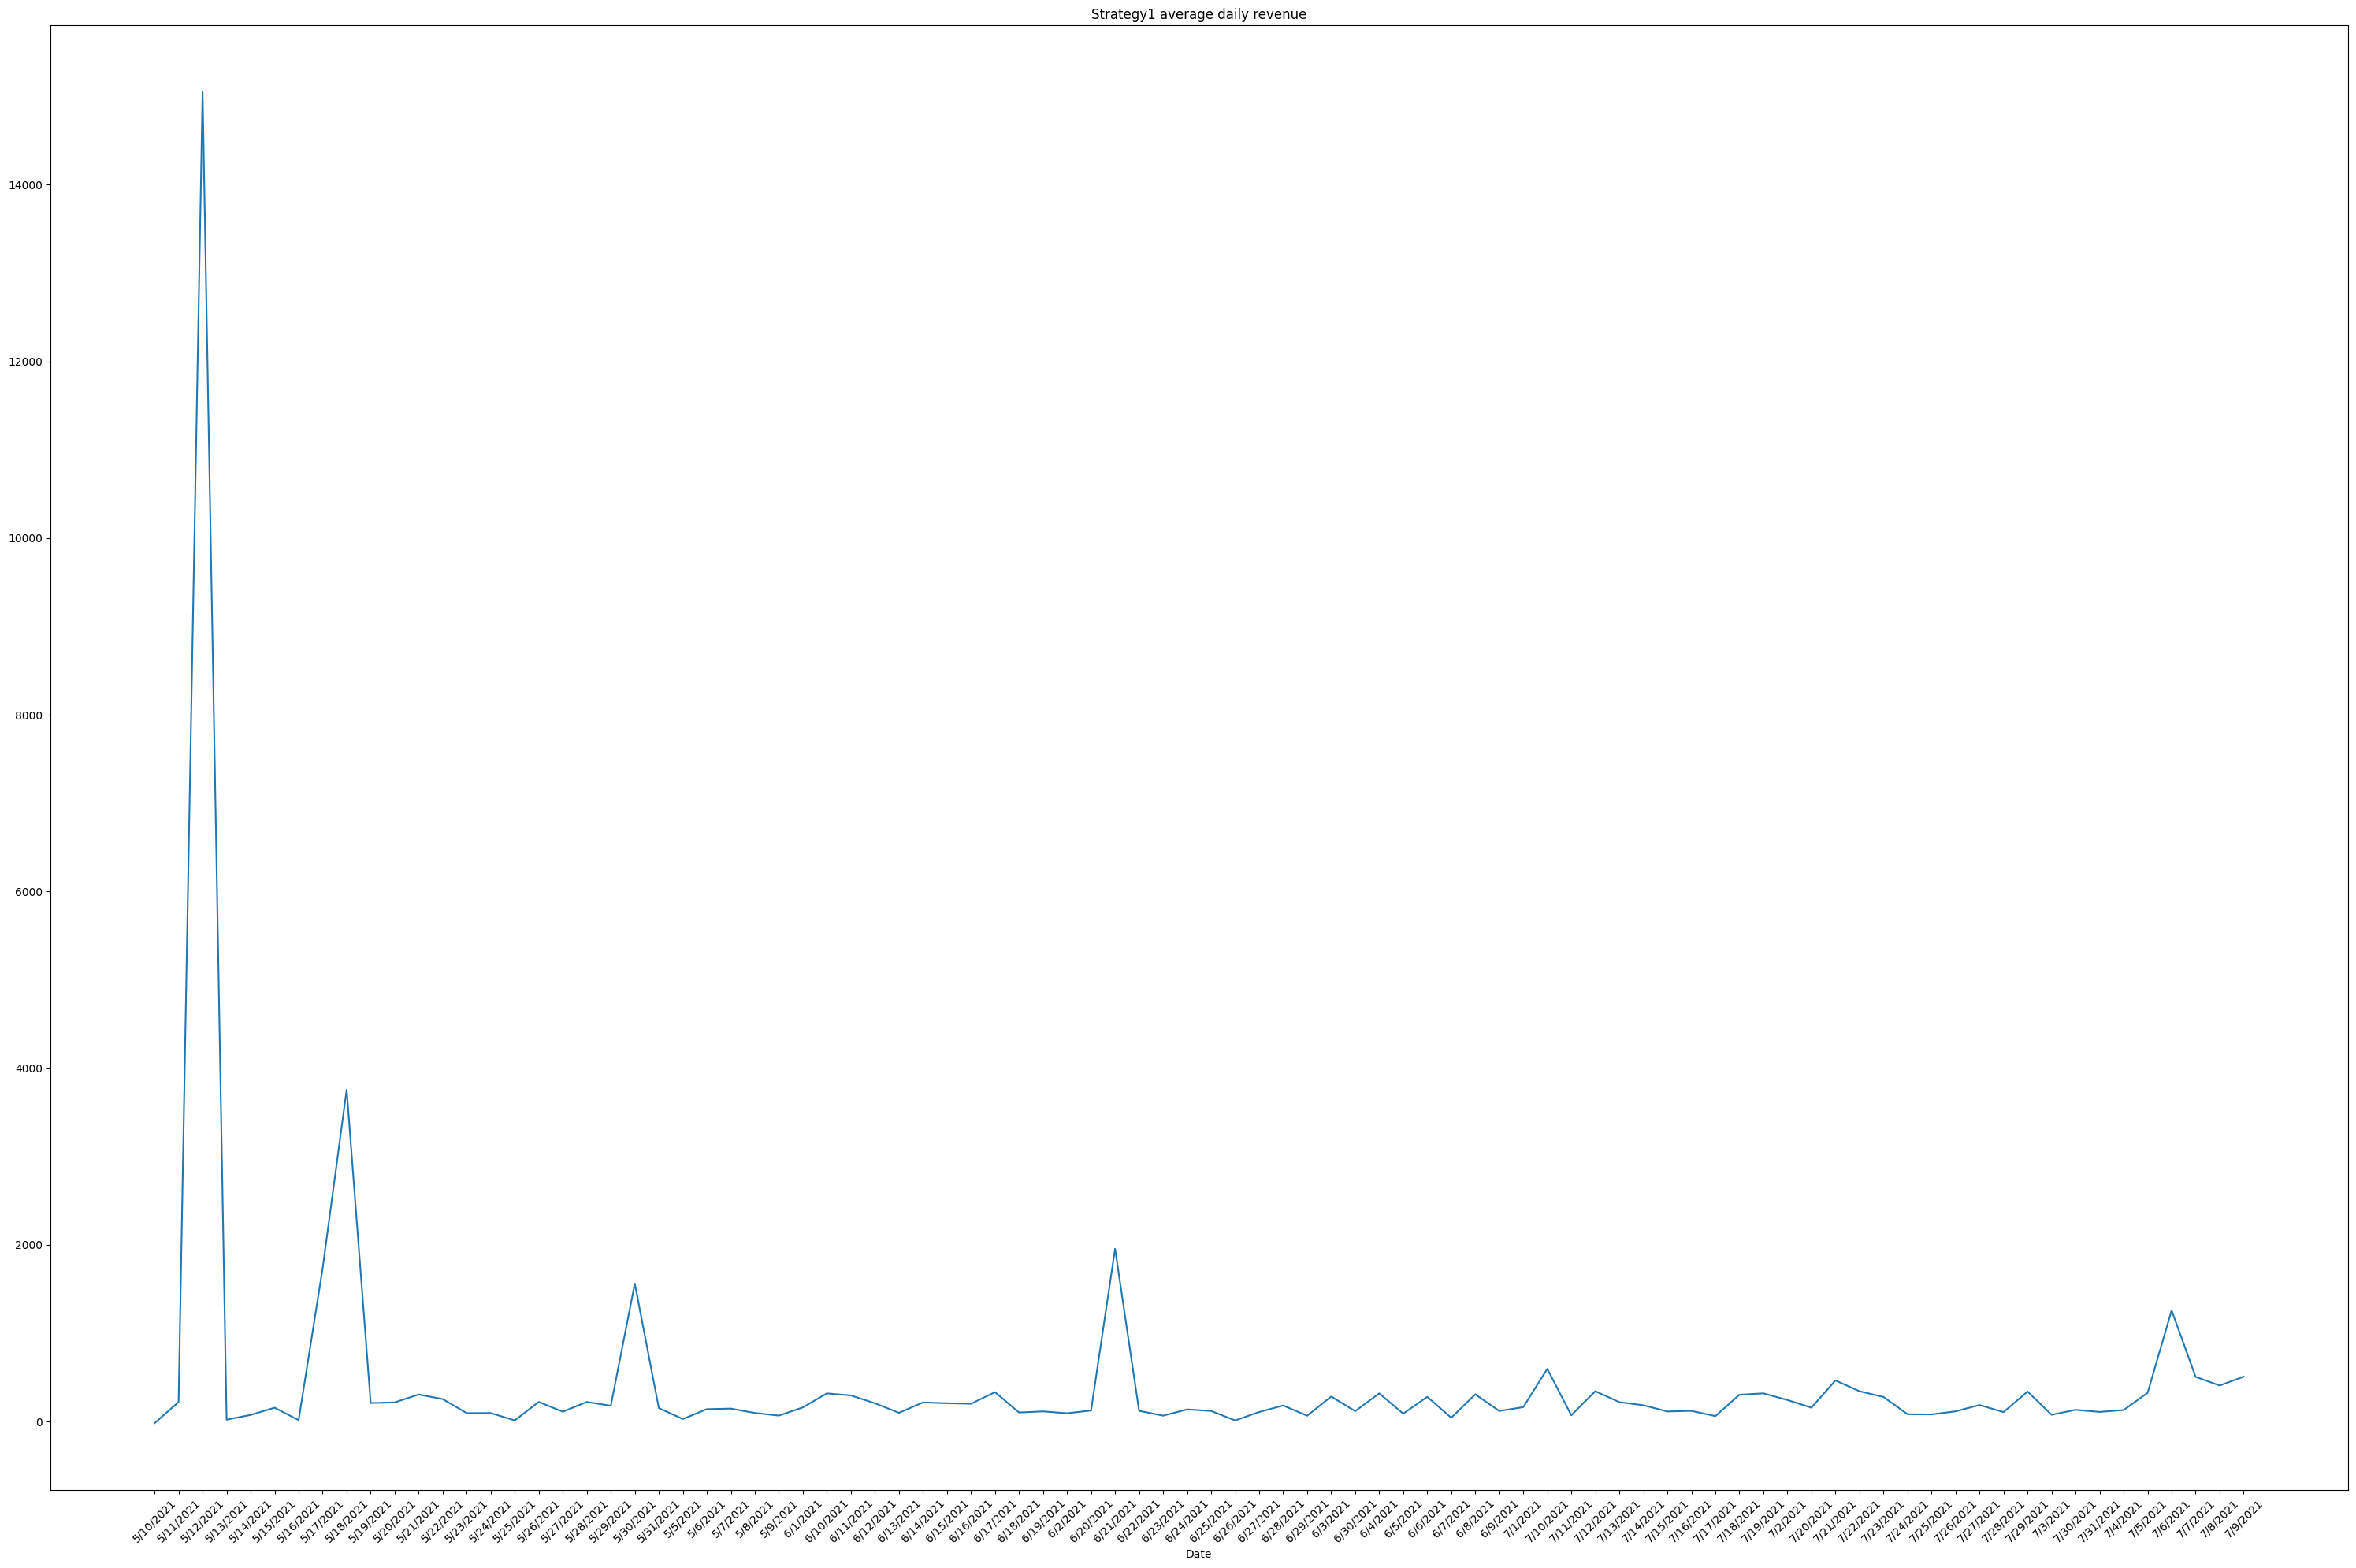

In [75]:
# Average daily revenue
plt.figure(figsize=(30,20))
strategy1.groupby('Date').strategy1_revenue.mean().plot()
plt.title('Strategy1 average daily revenue')
plt.xticks(strategy1.groupby('Date').strategy1_revenue.mean().reset_index().index,
           labels = strategy1.groupby('Date').strategy1_revenue.mean().reset_index()['Date'],
           rotation = 45)
plt.tight_layout()

In [76]:
strategy1.Month = strategy1.Month.astype(str)

In [77]:
strategy1.groupby('Month').strategy1_revenue.mean()

Month
5    930.075800
6    226.047622
7    268.710885
Name: strategy1_revenue, dtype: float64

([<matplotlib.axis.XTick at 0x7fb7012f3970>,
 [Text(0, 0, 'May'), Text(1, 0, 'June'), Text(2, 0, 'July')])

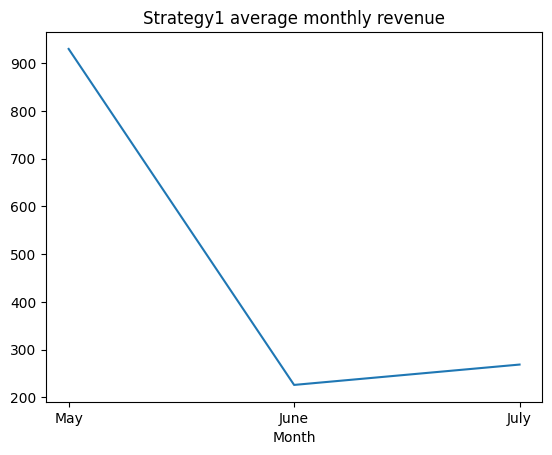

In [78]:
# monthly revenue
strategy1.groupby('Month').strategy1_revenue.mean().plot()
plt.title('Strategy1 average monthly revenue')
plt.xticks(ticks = strategy1.groupby('Month').strategy1_revenue.mean().reset_index().index, labels=['May','June','July'])


#### Revenue for strategy 2 in a daily and monthly basis

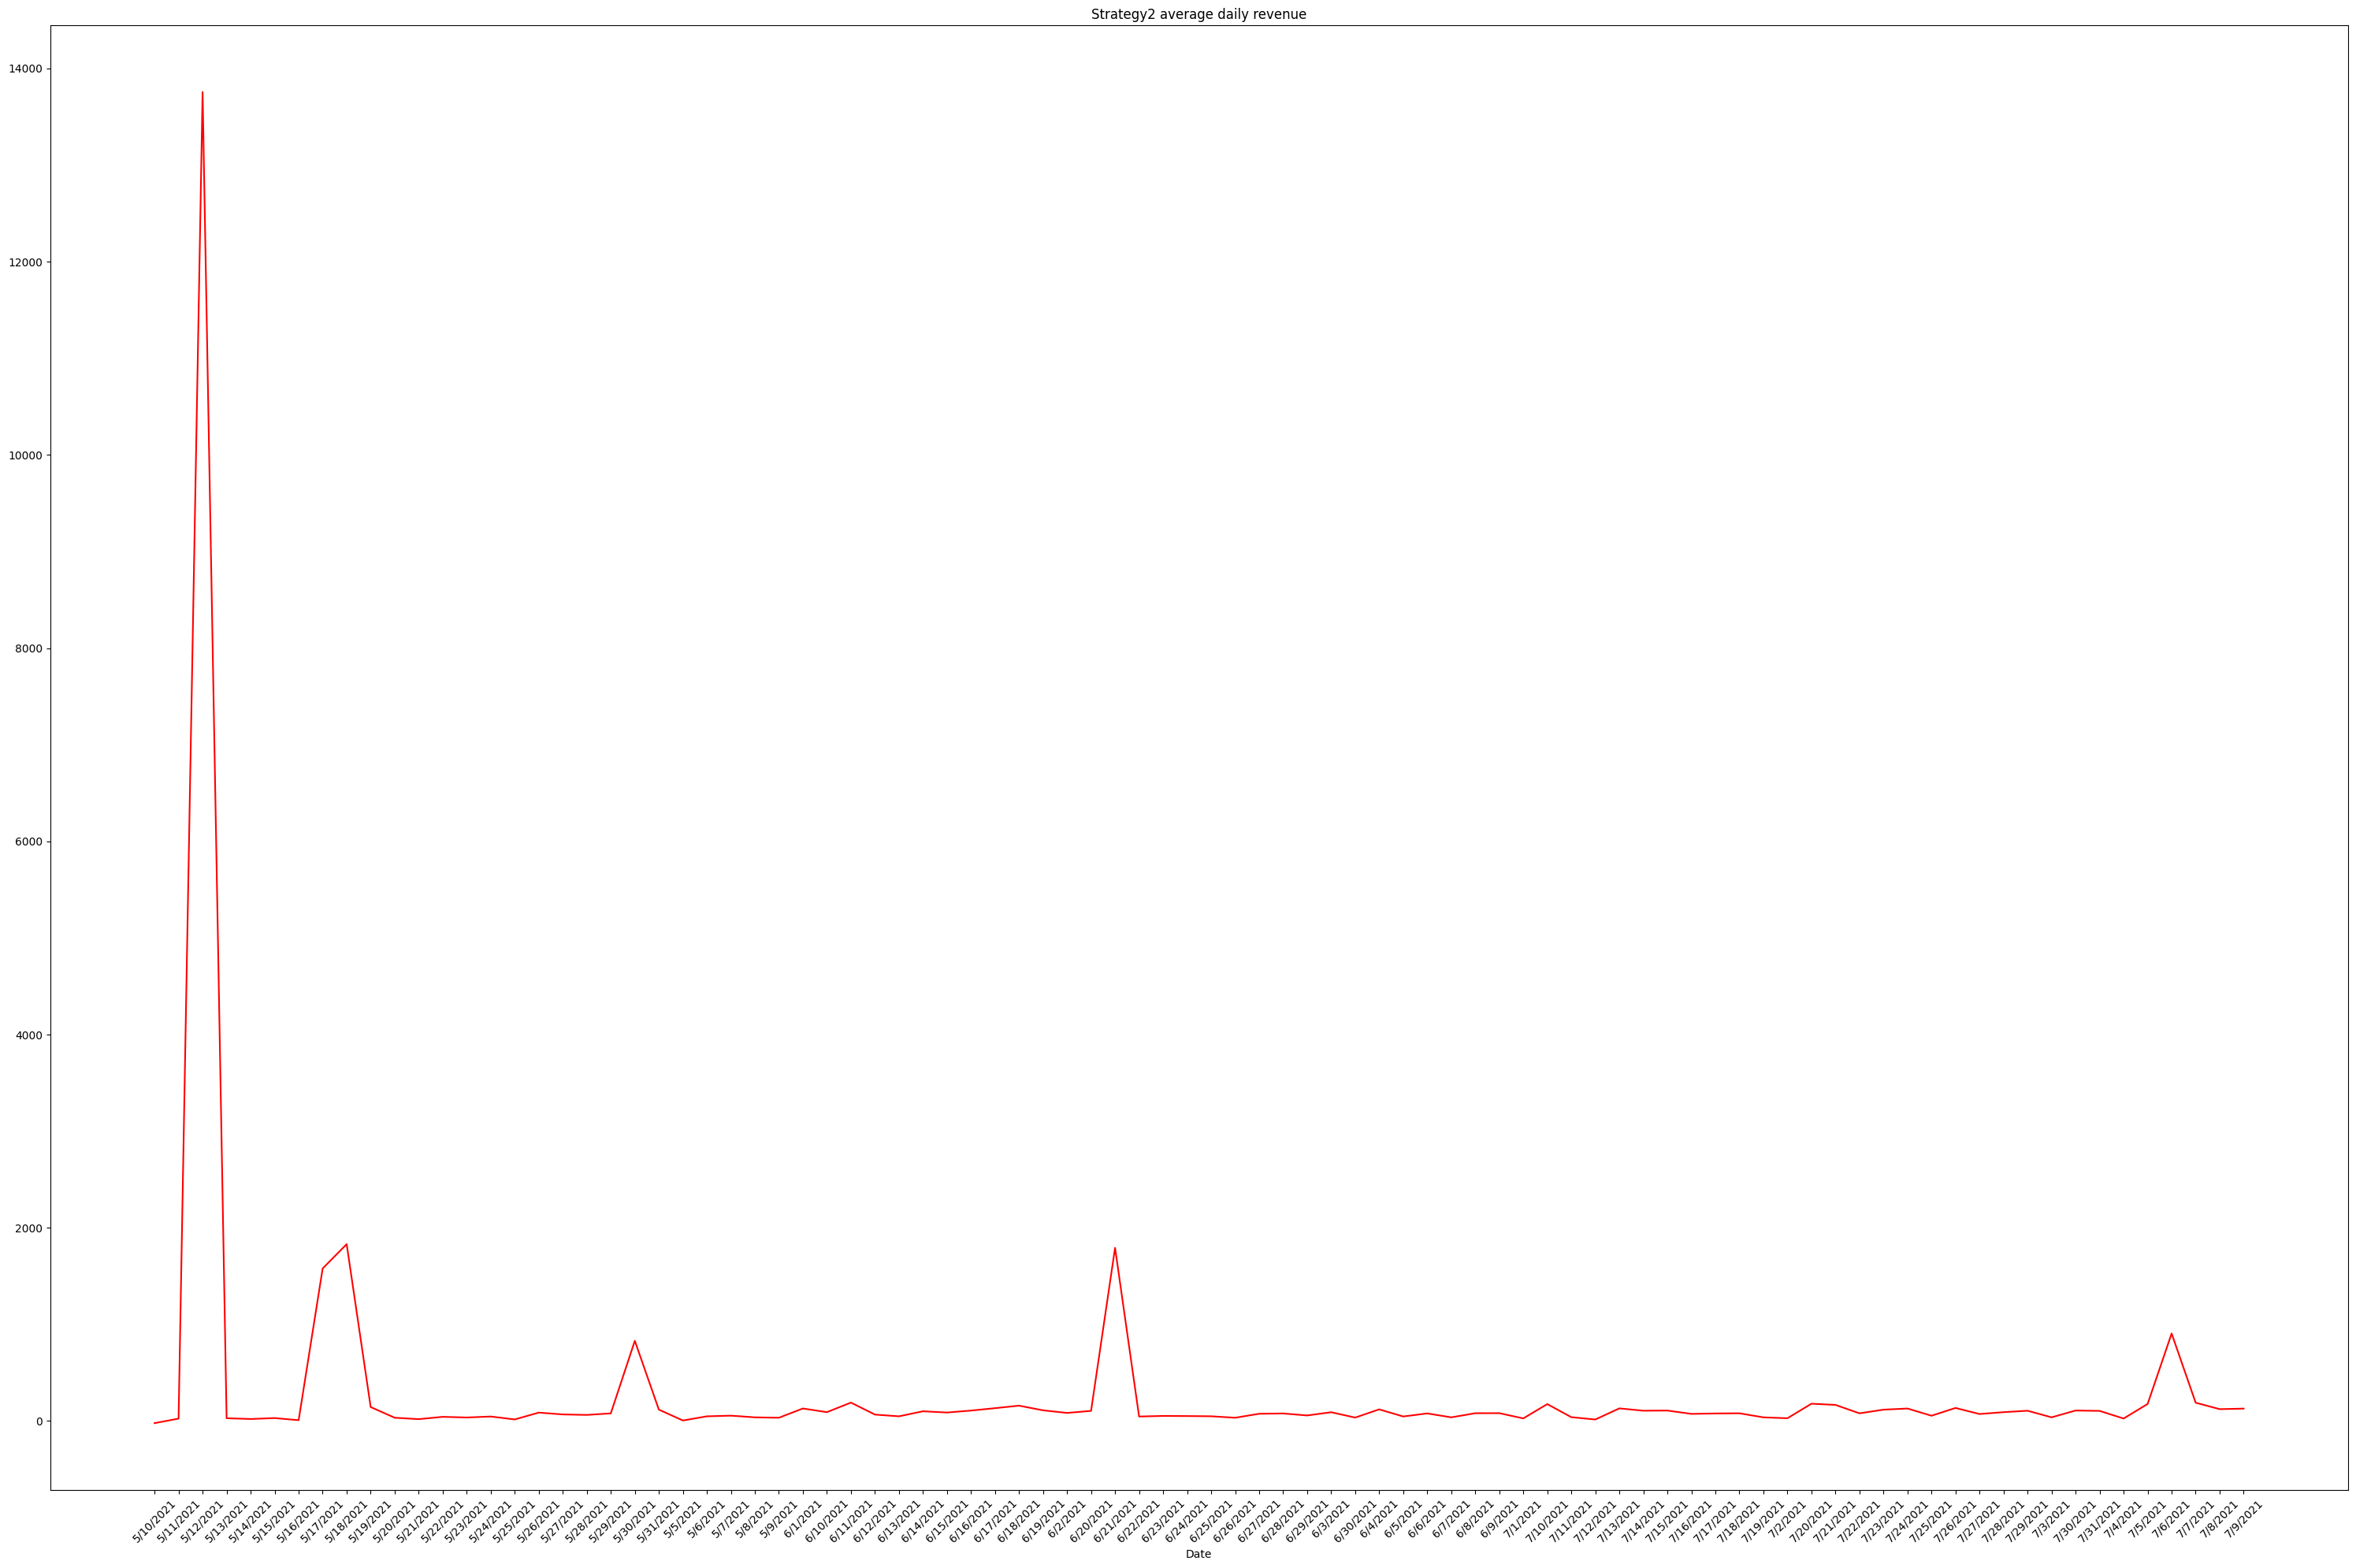

In [79]:
# Average daily revenue
plt.figure(figsize=(30,20))
strategy2.groupby('Date').strategy2_revenue.mean().plot(color='red')
plt.title('Strategy2 average daily revenue')
plt.xticks(strategy2.groupby('Date').strategy2_revenue.mean().reset_index().index,
           labels = strategy2.groupby('Date').strategy2_revenue.mean().reset_index()['Date'],
           rotation = 45)
plt.tight_layout()

In [80]:
strategy2.Month = strategy2.Month.astype(str)

In [81]:
strategy2.groupby('Month').strategy2_revenue.mean()


Month
5    704.703996
6    140.910756
7    123.814661
Name: strategy2_revenue, dtype: float64

([<matplotlib.axis.XTick at 0x7fb6fc502140>,
 [Text(0, 0, 'May'), Text(1, 0, 'June'), Text(2, 0, 'July')])

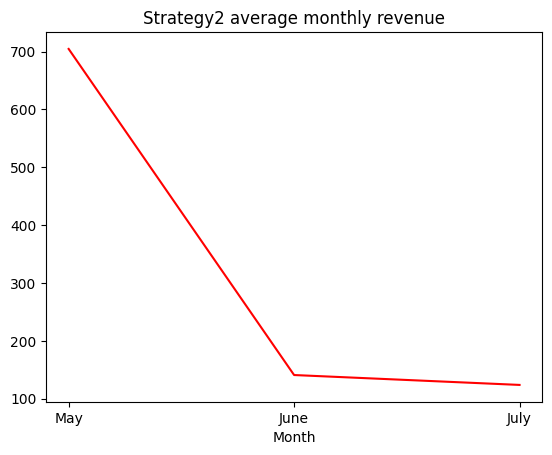

In [82]:
# monthly revenue
strategy2.groupby('Month').strategy2_revenue.mean().plot(color='red')
plt.title('Strategy2 average monthly revenue')
plt.xticks(ticks = strategy2.groupby('Month').strategy2_revenue.mean().reset_index().index, labels=['May','June','July'])


#### Correlation of price trends with revenue for strategy 1

In [83]:
strategy1.columns

Index(['interval_begin', 'interval_end', 'Date', 'Month', 'Hour Ending',
       'charging_mwh', 'discharging_mwh', 'state_of_charge_mwh',
       'cleared_mw_gen_energy', 'cleared_mw_load_energy',
       'cleared_mw_raise_reg', 'cleared_mw_lower_reg', 'price_energy',
       'price_lower_reg', 'price_raise_reg', 'gen_energy', 'load_energy',
       'discharged_reg_raise', 'charged_reg_lower', 'reg_raise', 'reg_lower',
       'strategy1_revenue'],
      dtype='object')

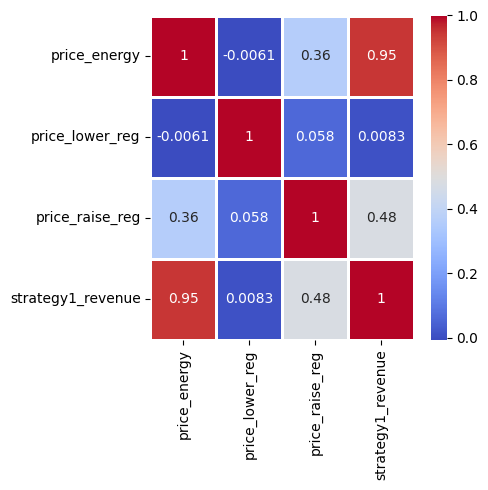

In [84]:
plt.figure(figsize=(5,5))
sns.heatmap(strategy1.loc[:,['price_energy','price_lower_reg','price_raise_reg','strategy1_revenue']].corr(),cmap='coolwarm',linewidth=1,linecolor='white',annot=True)
plt.tight_layout()

#### Correlation of price trends with revenue for strategy 2


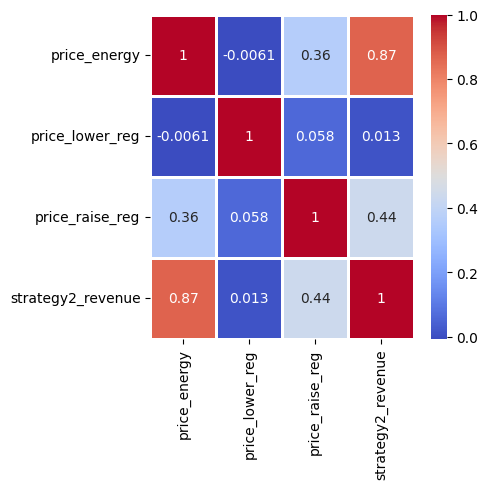

In [85]:
plt.figure(figsize=(5,5))
sns.heatmap(strategy2.loc[:,['price_energy','price_lower_reg','price_raise_reg','strategy2_revenue']].corr(),cmap='coolwarm',linewidth=1,linecolor='white',annot=True)
plt.tight_layout()

#### Plot revenue v/s prices for Strategy 1 and Strategy 2

In [86]:
# price_energy
price_energy1 = strategy1.groupby('Date').price_energy.mean().reset_index()
price_energy2 = strategy2.groupby('Date').price_energy.mean().reset_index()
# price_lower_reg
price_lower_reg1 = strategy1.groupby('Date').price_lower_reg.mean().reset_index()
price_lower_reg2 = strategy2.groupby('Date').price_lower_reg.mean().reset_index()
# price_raise_reg
price_raise_reg1 = strategy1.groupby('Date').price_raise_reg.mean().reset_index()
price_raise_reg2 = strategy2.groupby('Date').price_raise_reg.mean().reset_index()
# Average daily revenue
avg_rev1 = strategy1.groupby('Date').strategy1_revenue.mean().reset_index()
avg_rev2 = strategy2.groupby('Date').strategy2_revenue.mean().reset_index()

In [87]:
df1 = strategy1.groupby('Date').mean().reset_index()
df2 = strategy2.groupby('Date').mean().reset_index()

In [88]:
df1.head()

Date  Hour Ending  charging_mwh  discharging_mwh  state_of_charge_mwh  \
0  5/10/2021         12.5      0.743854         0.861806            72.131250   
1  5/11/2021         12.5      0.725174         0.796632            78.717431   
2  5/12/2021         12.5      0.872049         1.004861            73.195799   
3  5/13/2021         12.5      0.561458         0.540208            89.245313   
4  5/14/2021         12.5      0.664653         0.695451           105.666944   

   cleared_mw_gen_energy  cleared_mw_load_energy  cleared_mw_raise_reg  \
0               4.916667                6.482639             42.145833   
1               3.833333                4.937500             37.878472   
2               8.059028               16.701389             52.472222   
3               0.732639                0.559028             44.920139   
4               3.267361                3.270833             35.809028   

   cleared_mw_lower_reg  price_energy  price_lower_reg  price_raise_reg  \
0             43.690972     15.652431         8.653924        10.954687   
1             45.232639     72.884826         7.200764        23.842569   
2             39.663194   1335.157743        12.084896        21.572882   
3             60.802083     46.703229         7.996319         9.216736   
4             46.875000     46.535486         9.771181         9.355382   

    gen_energy  load_energy  discharged_reg_raise  charged_reg_lower  \
0    18.004201  -114.996455             32.483413          37.485059   
1    62.930324    49.573310            102.958247         -43.120282   
2  6746.777497  1402.591470           6999.933089        -135.470790   
3     5.579745    -0.305286             31.886735         -17.565550   
4    28.716056     1.788588             52.678222         -16.592205   

   reg_raise  reg_lower  strategy1_revenue  
0   3.998712   4.213819         -18.811251  
1  44.305648   3.559722         220.206970  
2  25.695694   8.790240       15048.317201  
3   0.691117   0.335793          20.622554  
4   5.903562   1.718597          74.212819

In [89]:
import warnings
warnings.filterwarnings("ignore")

In [90]:
fig1 = plt.figure(figsize=(30,20),dpi=350)
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(df1.Date,df1.price_energy,label='Price energy')
ax1.plot(df1.Date,df1.price_lower_reg,label='Price lower reg')
ax1.plot(df1.Date,df1.price_raise_reg,label='Price raise reg')
ax1.plot(df1.Date,df1.strategy1_revenue,label='Average Daily Revenue')
ax1.legend(loc=10,fontsize=20)
plt.tight_layout()
ax1.set_xticks(ticks = df1.Date,rotation=45, labels=df1.Date)
ax1.set_title('Strategy-1',color='blue',size=80)
plt.show()

In [41]:
fig1 = plt.figure(figsize=(30,20),dpi=350)
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(df2.Date,df2.price_energy,label='Price energy')
ax1.plot(df2.Date,df2.price_lower_reg,label='Price lower reg')
ax1.plot(df2.Date,df2.price_raise_reg,label='Price raise reg')
ax1.plot(df2.Date,df2.strategy2_revenue,label='Average Daily Revenue')
ax1.legend(loc=10,fontsize=20)
plt.tight_layout()
ax1.set_xticks(ticks = df2.Date,rotation=45, labels=df2.Date)
ax1.set_title('Strategy-2',color='red',size=80)
plt.show()

#### Plot maximum and average prices aggregated at monthly

In [91]:
df_max1 = strategy1.groupby('Month').max().reset_index().loc[:,['Month','price_energy','price_raise_reg','price_lower_reg']]
df_mean1 = strategy1.groupby('Month').mean().reset_index().loc[:,['Month','price_energy','price_raise_reg','price_lower_reg']]

In [92]:
df_max1.head()

Month  price_energy  price_raise_reg  price_lower_reg
0     5       15000.0          13254.4            82.72
1     6       13431.8          13464.7            45.90
2     7       10755.7           8795.7           101.07

In [93]:
forecast_max_price_gen = forecast.price_gen_energy.max()
forecast_max_raise_reg = forecast.price_gen_raise_reg.max()
forecast_max_lower_reg = forecast.price_gen_lower_reg.max()
forecast_mean_price_gen = forecast.price_gen_energy.mean()
forecast_mean_raise_reg = forecast.price_gen_raise_reg.mean()
forecast_mean_lower_reg = forecast.price_gen_lower_reg.mean()

In [94]:
df_max1 = df_max1.append({'Month':str(8),'price_energy':forecast_max_price_gen,'price_raise_reg':forecast_max_raise_reg,'price_lower_reg':forecast_max_lower_reg},ignore_index=True)

In [95]:
df_mean1 = df_mean1.append({'Month':str(8),'price_energy':forecast_mean_price_gen,'price_raise_reg':forecast_mean_raise_reg,'price_lower_reg':forecast_mean_lower_reg},ignore_index=True)

In [96]:
forecast.head()

interval_begin       Date  price_gen_energy  \
0  2021-08-01 00:00:00+10:00 2021-08-01            132.47   
1  2021-08-01 00:05:00+10:00 2021-08-01            117.00   
2  2021-08-01 00:10:00+10:00 2021-08-01            117.00   
3  2021-08-01 00:15:00+10:00 2021-08-01            117.00   
4  2021-08-01 00:20:00+10:00 2021-08-01             84.30   

   price_gen_lower_reg  price_gen_raise_reg  
0                17.52                24.90  
1                13.70                18.40  
2                10.70                12.75  
3                10.60                12.75  
4                10.60                12.75

In [97]:
df_max1.head()

Month  price_energy  price_raise_reg  price_lower_reg
0     5      15000.00          13254.4            82.72
1     6      13431.80          13464.7            45.90
2     7      10755.70           8795.7           101.07
3     8       1027.88            415.5           399.34

In [98]:
fig1 = plt.figure(figsize=(30,20),dpi=350)
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(df_max1.Month,df_max1.price_energy,label='Max Price energy')
ax1.plot(df_max1.Month,df_max1.price_lower_reg,label='Max Price lower reg')
ax1.plot(df_max1.Month,df_max1.price_raise_reg,label='Max Price raise reg')
ax1.legend(loc=10,fontsize=30)
plt.tight_layout()
ax1.set_xticks(ticks = df_max1.Month,rotation=45, labels=df_max1.Month)
ax1.set_title('Max Prices',color='blue',size=80)
plt.show()

In [99]:
fig1 = plt.figure(figsize=(30,20),dpi=350)
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(df_mean1.Month,df_mean1.price_energy,label='Avg Price energy')
ax1.plot(df_mean1.Month,df_mean1.price_lower_reg,label='Avg Price lower reg')
ax1.plot(df_mean1.Month,df_mean1.price_raise_reg,label='Avg Price raise reg')
ax1.legend(loc=10,fontsize=30)
plt.tight_layout()
ax1.set_xticks(ticks = df_mean1.Month,rotation=45, labels=df_mean1.Month)
ax1.set_title('Avg Prices',color='blue',size=80)
plt.show()

#### Days with Strategy 1 over Strategy 2

In [101]:
forecast.head()

interval_begin       Date  price_gen_energy  \
0  2021-08-01 00:00:00+10:00 2021-08-01            132.47   
1  2021-08-01 00:05:00+10:00 2021-08-01            117.00   
2  2021-08-01 00:10:00+10:00 2021-08-01            117.00   
3  2021-08-01 00:15:00+10:00 2021-08-01            117.00   
4  2021-08-01 00:20:00+10:00 2021-08-01             84.30   

   price_gen_lower_reg  price_gen_raise_reg  
0                17.52                24.90  
1                13.70                18.40  
2                10.70                12.75  
3                10.60                12.75  
4                10.60                12.75

In [102]:
forecast1 = forecast.groupby('Date').mean()

In [103]:
forecast1.head()

price_gen_energy  price_gen_lower_reg  price_gen_raise_reg
Date                                                                  
2021-08-01         86.273715            14.665069            33.600347
2021-08-02         25.057951            11.146319            22.040972
2021-08-03         16.211875            13.431389            16.328993
2021-08-04         55.834132            13.215451            29.484236
2021-08-05         45.442257            13.176840            19.250590

In [104]:
price_gen75 = forecast1.describe().loc['75%','price_gen_energy']
price_raise_reg75 = forecast1.describe().loc['75%','price_gen_raise_reg']

In [105]:
forecast1.loc[(forecast1.price_gen_energy>=price_gen75)&(forecast1.price_gen_raise_reg>=price_raise_reg75),:]

price_gen_energy  price_gen_lower_reg  price_gen_raise_reg
Date                                                                  
2021-08-01         86.273715            14.665069            33.600347
2021-08-25         96.676771            10.813264            38.378125
2021-08-26        103.966285            11.562951            45.845937